In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
import timeit

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
data = pd.read_csv('data.csv')
X_train = pd.read_csv('train_x.csv')
y_train = pd.read_csv('train_y.csv').values
X_test = pd.read_csv('test_x.csv')
y_test = pd.read_csv('test_y.csv').values

In [36]:
data.drop(['examide', 'citoglipton'], axis=1, inplace=True)
X_train.drop(['examide', 'citoglipton'], axis=1, inplace=True)
X_test.drop(['examide', 'citoglipton'], axis=1, inplace=True)

In [37]:
def getErrorScoreWithVariableK() :
    errorRate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors = i, n_jobs=-1)
        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
#     elapsedTime = timeit.default_timer() - startTime
#     print("time taken : ",elapsedTime)
        error = np.mean(prediction != y_test)
#     print('\tError rate : ',error)
        errorRate.append(error)
    plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


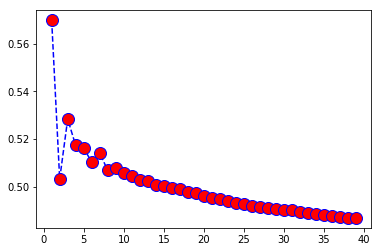

In [16]:
getErrorScoreWithVariableK()

<h3>Considering n_neighbors = 25</h3>

In [38]:
getScoreMatrix(X_train, y_train, X_test, y_test)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


time taken :  82.05976962321427
	Error rate :  0.5000836020377913
[[9419 1610   15]
 [5087 1930   50]
 [1540  658   46]]


             precision    recall  f1-score   support

          1       0.59      0.85      0.70     11044
          2       0.46      0.27      0.34      7067
          3       0.41      0.02      0.04      2244

avg / total       0.52      0.56      0.50     20355



In [39]:
scaler = StandardScaler()

In [40]:
scoreTable = data.corr(method='pearson')

In [41]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [42]:
FeatureIndices = scoreTable.index.tolist()

In [43]:
def sortDic(UnsortedDictionary):
    dicItems = [(value,key) for key,value in UnsortedDictionary.items()]
    dicItems.sort()
    dicItems.reverse()
    dicItems = {key:value for value,key in dicItems}
    return dicItems

In [44]:
FeatureScoresForTargetVariable = {}

In [45]:
for i in FeatureIndices[:-1]:
    FeatureScoresForTargetVariable[i] = scoreTable.loc[i][FeatureIndices[-1]]

In [46]:
FeatureScoresForTargetVariable = sortDic(FeatureScoresForTargetVariable)
print(FeatureScoresForTargetVariable)

{'number_inpatient': 0.23499322104350792, 'number_diagnoses': 0.10683538317249323, 'number_emergency': 0.10144640836000685, 'number_outpatient': 0.06758384901961667, 'diabetesMed': 0.056870893476062306, 'time_in_hospital': 0.05551503440257344, 'num_medications': 0.0498134498193347, 'insulin': 0.045585559775079505, 'change': 0.04088562468889731, 'num_lab_procedures': 0.03855266483288926, 'admission_source_id': 0.03403288470655677, 'age': 0.03084576217400462, 'repaglinide': 0.021570059735798158, 'glipizide': 0.018511945197993297, 'discharge_disposition_id': 0.011689618691467755, 'max_glu_serum': 0.010076685370377154, 'acarbose': 0.0079833628468885, 'pioglitazone': 0.007527299425717639, 'rosiglitazone': 0.0030001062513368535, 'glipizide.metformin': 0.0026087811925410934, 'miglitol': 0.00229108971167481, 'glimepiride.pioglitazone': 0.0021830817658577825, 'acetohexamide': 0.002183081765857368, 'troglitazone': 0.0008247845180528176, 'nateglinide': -0.00039165261838214647, 'chlorpropamide': -

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
KNN = KNeighborsClassifier()

In [49]:
errorRate = []
#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
def trainTestScore(X_train, y_train, X_test, y_test):
    startTime = timeit.default_timer()
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
#     scaler = StandardScaler()
#     scaler.fit(X_test)
#     X_test = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = 25, n_jobs=-1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    print('\tError rate : ',error)
    errorRate.append(error)
    return error

In [50]:
Features = list(FeatureScoresForTargetVariable.keys())
def selectNextBestFeature(FeatureSubset, featureIndex) :
    while featureIndex<len(Features):
        checkFeature = Features[featureIndex]
        noMatchWithAnyone = True
        if len(FeatureSubset) == 0:
            noMatchWithAnyone = True
        else:
            for feature in FeatureSubset:
                print('feature:',feature,'\tkey:',checkFeature)
                if(scoreTable.loc[str(feature)][checkFeature] >= 0.7):
                    noMatchWithAnyone = False
                    break          
        if(noMatchWithAnyone == True):
            return checkFeature, featureIndex
        featureIndex += 1

In [52]:
def scoresForFeatures():
    noOfFeatures = 3
#     while noOfFeatures <=36:
    i = 0
    scores = []
    FinalSubset = []
    LeastError = 100
    featureIndex = -1
    while i<noOfFeatures:
        Subset = FinalSubset[:]
        feature, featureIndex = selectNextBestFeature(FinalSubset, featureIndex+1 )
        Subset.append(feature)
        error = trainTestScore(X_train.loc[:,Subset], y_train, X_test.loc[:, Subset], y_test)
        if(error < LeastError):
            FinalSubset = Subset[:]
            LeastError = error
            i += 1
        print("feature subset : ",Subset, "error : ", error)
        print("\n\n\nBest feature subset : ",FinalSubset, "error : ", LeastError)

In [53]:
scoresForFeatures()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


time taken :  13.067400683575556
	Error rate :  0.4885373130978195
feature subset :  ['number_inpatient'] error :  0.4885373130978195



Best feature subset :  ['number_inpatient'] error :  0.4885373130978195
feature: number_inpatient 	key: number_diagnoses
time taken :  5.644824031639246
	Error rate :  0.5288315813615618
feature subset :  ['number_inpatient', 'number_diagnoses'] error :  0.5288315813615618



Best feature subset :  ['number_inpatient'] error :  0.4885373130978195
feature: number_inpatient 	key: number_emergency
time taken :  14.312070205300188
	Error rate :  0.49943600332612464
feature subset :  ['number_inpatient', 'number_emergency'] error :  0.49943600332612464



Best feature subset :  ['number_inpatient'] error :  0.4885373130978195
feature: number_inpatient 	key: number_outpatient
time taken :  14.314558520345713
	Error rate :  0.5020498893353368
feature subset :  ['number_inpatient', 'number_outpatient'] error :  0.5020498893353368



Best feature subset :  ['n

time taken :  13.00910391076195
	Error rate :  0.48395122415976644
feature subset :  ['number_inpatient', 'diabetesMed', 'chlorpropamide'] error :  0.48395122415976644



Best feature subset :  ['number_inpatient', 'diabetesMed'] error :  0.48395122415976644
feature: number_inpatient 	key: glyburide.metformin
feature: diabetesMed 	key: glyburide.metformin
time taken :  10.392826097839588
	Error rate :  0.5815510213243302
feature subset :  ['number_inpatient', 'diabetesMed', 'glyburide.metformin'] error :  0.5815510213243302



Best feature subset :  ['number_inpatient', 'diabetesMed'] error :  0.48395122415976644
feature: number_inpatient 	key: glimepiride
feature: diabetesMed 	key: glimepiride
time taken :  11.998192643598713
	Error rate :  0.48726640813837363
feature subset :  ['number_inpatient', 'diabetesMed', 'glimepiride'] error :  0.48726640813837363



Best feature subset :  ['number_inpatient', 'diabetesMed'] error :  0.48395122415976644
feature: number_inpatient 	key: metform

In [54]:
bestFeatureSubset = ['number_inpatient', 'diabetesMed', 'gender']

In [55]:
def getScoreMatrix(X_train, y_train, X_test, y_test) :
    startTime = timeit.default_timer()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler = StandardScaler()
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = 25, n_jobs=-1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    print('\tError rate : ',error)
    print(confusion_matrix(y_test, prediction))
    print ('\n')
    print(classification_report(y_test, prediction))

In [56]:
getScoreMatrix(X_train.loc[:,bestFeatureSubset], y_train, X_test.loc[:, bestFeatureSubset], y_test)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


time taken :  6.905883209619333
	Error rate :  0.503913281817139
[[9284 1746   14]
 [4963 2046   58]
 [1417  774   53]]


             precision    recall  f1-score   support

          1       0.59      0.84      0.70     11044
          2       0.45      0.29      0.35      7067
          3       0.42      0.02      0.04      2244

avg / total       0.52      0.56      0.50     20355

